# Course 7 - Data Analysis with R Programming

## Week 3 - Cleaning Data

### Cleaning up with the basics

In [ ]:
install.packages("here")
library("here")
install.packages("skimr")
library("skimr")
install.packages("janitor")
library("janitor")
install.packages("dplyr")
library("dplyr")

In [ ]:
install.packages("palmerpenguins")
library("palmerpenguins")

The skim_without_charts function gives us a comprehensive summary of a dataset (via skimr package).

In [49]:
skim_without_charts(penguins)

,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,factor,species,0,1.0000000,FALSE,3,"Ade: 152, Gen: 124, Chi: 68",NA,NA,NA,NA,NA,NA,NA
2,factor,island,0,1.0000000,FALSE,3,"Bis: 168, Dre: 124, Tor: 52",NA,NA,NA,NA,NA,NA,NA
3,factor,sex,11,0.9680233,FALSE,2,"mal: 168, fem: 165",NA,NA,NA,NA,NA,NA,NA
4,numeric,bill_length_mm,2,0.9941860,NA,NA,NA,43.92193,5.4595837,32.1,39.225,44.45,48.5,59.6
5,numeric,bill_depth_mm,2,0.9941860,NA,NA,NA,17.15117,1.9747932,13.1,15.600,17.30,18.7,21.5
6,numeric,flipper_length_mm,2,0.9941860,NA,NA,NA,200.91520,14.0617137,172.0,190.000,197.00,213.0,231.0
7,numeric,body_mass_g,2,0.9941860,NA,NA,NA,4201.75439,801.9545357,2700.0,3550.000,4050.00,4750.0,6300.0
8,numeric,year,0,1.0000000,NA,NA,NA,2008.02907,0.8183559,2007.0,2007.000,2008.00,2009.0,2009.0


-- Data Summary ------------------------
                           Values  
Name                       penguins
Number of rows             344     
Number of columns          8       
_______________________            
Column type frequency:             
  factor                   3       
  numeric                  5       
________________________           
Group variables            None    

-- Variable type: factor -------------------------------------------------------
  skim_variable n_missing complete_rate ordered n_unique
1 species               0         1     FALSE          3
2 island                0         1     FALSE          3
3 sex                  11         0.968 FALSE          2
  top_counts                 
1 Ade: 152, Gen: 124, Chi: 68
2 Bis: 168, Dre: 124, Tor: 52
3 mal: 168, fem: 165         

-- Variable type: numeric ------------------------------------------------------
  skim_variable     n_missing complete_rate   mean      sd     p0    p25    p50
1 bill_

The glimpse function gives us a quick idea of the dataset (via dplyr package).

In [50]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Gentoo, Chinstrap, Gentoo, Chinstrap, Gentoo, Gentoo~
$ island            <fct> Biscoe, Dream, Biscoe, Dream, Biscoe, Biscoe, Dream,~
$ bill_length_mm    <dbl> 59.6, 58.0, 55.9, 55.8, 55.1, 54.3, 54.2, 53.5, 53.4~
$ bill_depth_mm     <dbl> 17.0, 17.8, 17.0, 19.8, 16.0, 15.7, 20.8, 19.9, 15.8~
$ flipper_length_mm <int> 230, 181, 228, 207, 230, 231, 201, 205, 219, 205, 19~
$ body_mass_g       <int> 6050, 3700, 5600, 4000, 5850, 5650, 4300, 4500, 5500~
$ sex               <fct> male, female, male, male, male, male, male, male, ma~
$ year              <int> 2007, 2007, 2009, 2009, 2009, 2008, 2008, 2008, 2009~


The head function gives us a preview of the column names and first few rows of data.

In [51]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,59.6,17.0,230,6050,male,2007
Chinstrap,Dream,58.0,17.8,181,3700,female,2007
Gentoo,Biscoe,55.9,17.0,228,5600,male,2009
Chinstrap,Dream,55.8,19.8,207,4000,male,2009
Gentoo,Biscoe,55.1,16.0,230,5850,male,2009
Gentoo,Biscoe,54.3,15.7,231,5650,male,2008


To select only one column (via dplyr package):

In [ ]:
penguins %>%
    select (species)

To select all columns but one specific (via dplyr package):

In [ ]:
penguins %>%
    select (-species)

To rename a column (via dplyr package):

In [ ]:
penguins %>%
    rename(island_new=island)

To change the letter casing of all columns (via dplyr package):

In [ ]:
rename_with(penguins,toupper)

In [ ]:
rename_with(penguins,tolower)

To ensure there are only characters, numbers and underscores in the column names (via janitor package):

In [ ]:
clean_names(penguins)

### Organize your data

To load the core tidyverse package:

In [53]:
library(tidyverse)

To arrange a column in ascending order and output a tibble:

In [ ]:
penguins %>%
    arrange(bill_length_mm)

To arrange a column in descending order:

In [ ]:
penguins %>%
    arrange(-bill_length_mm)

To save a new data frame based on grouping in one set of data:

In [54]:
penguins2 <- penguins %>% arrange(-bill_length_mm)
view(penguins2)

To arrange the penguin data by island, then remove rows with NA vaules, then summarize all bill length data into a new column with averages for that island.

In [57]:
penguins %>% group_by(island) %>% drop_na() %>% summarize(mean_bill_length_mm = mean(bill_length_mm))

island,mean_bill_length_mm
<fct>,<dbl>
Biscoe,45.24847
Dream,44.22195
Torgersen,39.03830


To arrange the penguin data by island, then remove rows with NA vaules, then summarize all bill length data into a new column with the max for that island:

In [58]:
penguins %>% group_by(island) %>% drop_na() %>% summarize(max_bill_length_mm = max(bill_length_mm))

island,max_bill_length_mm
<fct>,<dbl>
Biscoe,59.6
Dream,58.0
Torgersen,46.0


To sort by species and island, then output two new columns of max bill length and mean bill length.

In [59]:
penguins %>% group_by(species, island) %>% drop_na() %>% summarize(max_bl = max(bill_length_mm), mean_bl = mean(bill_length_mm))

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


species,island,max_bl,mean_bl
<fct>,<fct>,<dbl>,<dbl>
Adelie,Biscoe,45.6,38.97500
Adelie,Dream,44.1,38.52000
Adelie,Torgersen,46.0,39.03830
Chinstrap,Dream,58.0,48.83382
Gentoo,Biscoe,59.6,47.56807


To filter data to only include one value from a column, then get a glimpse of the results:

In [69]:
glimpse(
    penguins %>% 
        filter(species == "Adelie")
)

Rows: 152
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel~
$ island            <fct> Torgersen, Torgersen, Biscoe, Dream, Torgersen, Drea~
$ bill_length_mm    <dbl> 46.0, 45.8, 45.6, 44.1, 44.1, 43.2, 43.2, 43.1, 42.9~
$ bill_depth_mm     <dbl> 21.5, 18.9, 20.3, 19.7, 18.0, 18.5, 19.0, 19.2, 17.6~
$ flipper_length_mm <int> 194, 197, 191, 196, 210, 192, 197, 197, 196, 195, 19~
$ body_mass_g       <int> 4200, 4150, 4600, 4400, 4000, 4100, 4775, 3500, 4700~
$ sex               <fct> male, male, male, male, male, male, male, male, male~
$ year              <int> 2007, 2008, 2009, 2007, 2009, 2008, 2009, 2009, 2008~


### Transforming data

To combined values into vector lists, then create a data frame based on these lists:

In [70]:
id <- c(1:10)
name <- c("John Mendes", "Rob Stewart", "Rachel Abrahamson", "Christy Hickman", "Johnson Harper", "Candace Miller", "Carlson Landy", "Pansy Jordan", "Darius Berry", "Claudia Garcia")
job_title <- c("Professional", "Programmer", "Management", "Clerical", "Developer", "Programmer", "Management", "Clerical", "Developer", "Programmer")
employee <- data.frame(id, name, job_title)
print(employee)

   id              name    job_title
1   1       John Mendes Professional
2   2       Rob Stewart   Programmer
3   3 Rachel Abrahamson   Management
4   4   Christy Hickman     Clerical
5   5    Johnson Harper    Developer
6   6    Candace Miller   Programmer
7   7     Carlson Landy   Management
8   8      Pansy Jordan     Clerical
9   9      Darius Berry    Developer
10 10    Claudia Garcia   Programmer


To separate the employee names into first and last name:
separate(dataframe, column name, into what columns, how to separate)

In [71]:
separate(employee, name, into=c('first name','last name'),sep=' ')

id,first name,last name,job_title
<int>,<chr>,<chr>,<chr>
1,John,Mendes,Professional
2,Rob,Stewart,Programmer
3,Rachel,Abrahamson,Management
4,Christy,Hickman,Clerical
5,Johnson,Harper,Developer
6,Candace,Miller,Programmer
7,Carlson,Landy,Management
8,Pansy,Jordan,Clerical
9,Darius,Berry,Developer


To combine multiple columns into one:
unite(dataframe, column name, newcolumn1, newcolumn2, how to separate)

In [ ]:
unite(employee,'name', first_name, last_name,sep=' ')

To add new columns with calculations, then get summary data:

In [117]:
penguins %>%
    mutate(body_mass_kg=body_mass_g/1000, flipper_length_m=flipper_length_mm/1000) %>%
        drop_na() %>%
            group_by(species) %>%
                summarize(body_mass_kg_avg = mean(body_mass_kg), avg_flipper_length_m = mean(flipper_length_m))

species,body_mass_kg_avg,avg_flipper_length_m
<fct>,<dbl>,<dbl>
Adelie,3.706164,0.1901027
Chinstrap,3.733088,0.1958235
Gentoo,5.092437,0.2172353


## Week 3 - Take a closer look at the data

### Same data, different outcome

To installed the Tmisc package, activate it and add the "quartet" data:

In [ ]:
install.packages("Tmisc")
library(Tmisc)
data(quartet)

To glimpse the "quartet" data: 

In [125]:
glimpse(quartet)

Rows: 44
Columns: 3
$ set <fct> I, I, I, I, I, I, I, I, I, I, I, II, II, II, II, II, II, II, II, I~
$ x   <int> 10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5, 10, 8, 13, 9, 11, 14, 6, 4, ~
$ y   <dbl> 8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68,~


To summarise the data "sets":

In [127]:
quartet %>%
    group_by(set) %>%
        summarize(mean(x), sd(x), mean(y), sd(y), cor(x,y))

set,mean(x),sd(x),mean(y),sd(y),"cor(x, y)"
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
I,9,3.316625,7.500909,2.031568,0.8164205
II,9,3.316625,7.500909,2.031657,0.8162365
III,9,3.316625,7.500000,2.030424,0.8162867
IV,9,3.316625,7.500909,2.030579,0.8165214


To plot the set data:
ggplot(dataframe, aes(x_variable,y_variable))
aes = aesthetic mappings
geom_point to create a scatter plot
geom_smooth to add a trend line
method = smoothing function
se = confidence interval visible
facet_wrap to make a ribbon of panels based on values in a variable (a different graph for each value of "set")

`geom_smooth()` using formula 'y ~ x'



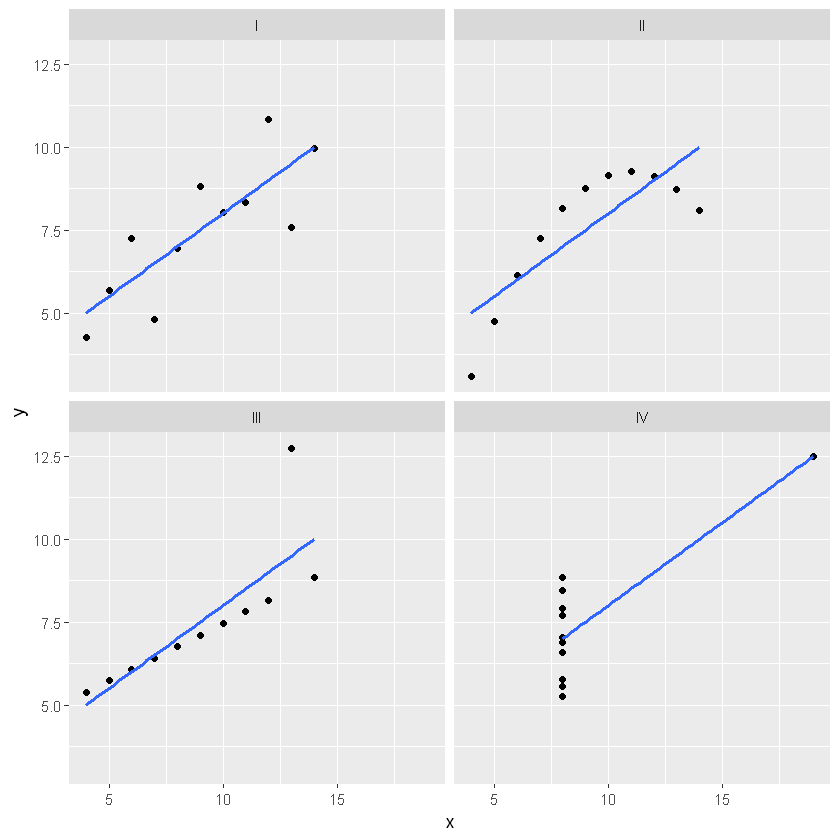

In [145]:
ggplot(quartet,aes(x,y)) + geom_point() + geom_smooth(method=lm,se=FALSE) + facet_wrap(~set)

Installing and activating the "datasauRus" package:

In [ ]:
install.packages("datasauRus")
library("datasauRus")

To plot the datasaurus_dozen data set:
aes(colour=dataset) means a different colour for each set
theme_void() means to have an empty theme, i.e. no lines or labels
theme(legend.position = "none") means to not show the legend for each colour/dataset
facet_wrap(~dataset, ncol=3) to make a ribbon of graphs based on each dataset, in 3 columns

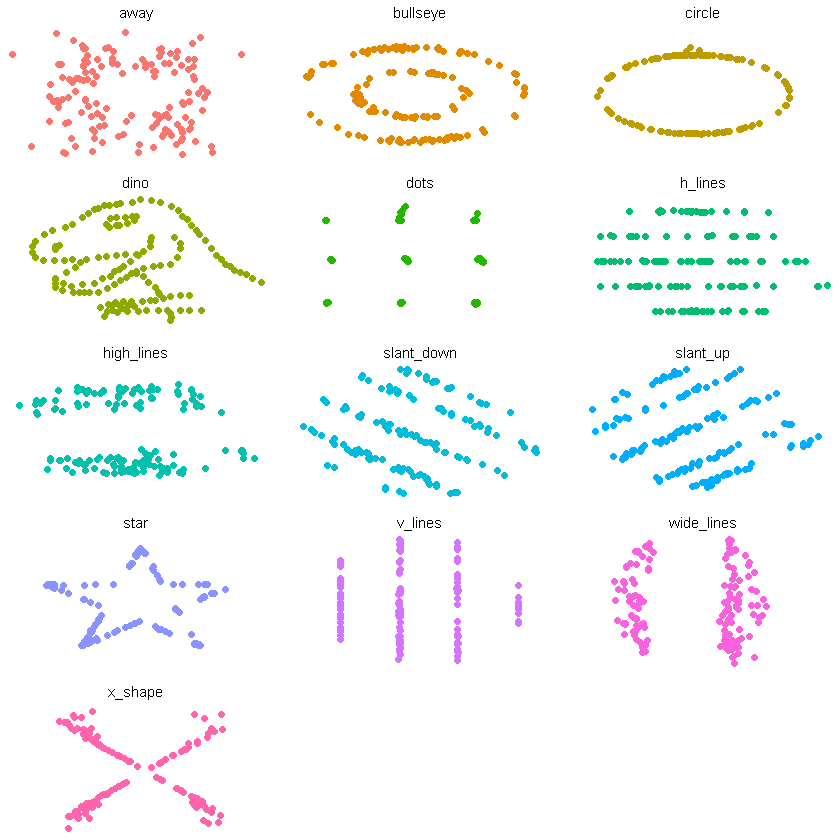

In [159]:
ggplot(datasaurus_dozen, aes(x=x,y=y,colour=dataset)) + geom_point() + theme_void() + theme(legend.position = "none") + facet_wrap(~dataset, ncol=3)

### The bias function

To install and activate the "SimDesign" package:

In [ ]:
install.packages("SimDesign")
library("SimDesign")

To combine values into vector lists, then run a bias function to compare:

In [163]:
actual_temp <- c(68.3, 70, 72.4, 71, 67, 70)
predicted_temp <- c(67.9, 69, 71.5, 70, 67, 69)
bias(actual_temp, predicted_temp)

[1] 0.7166667

The bias function compares the actual outcome and the predicted outcome of the data to determine the average amount the actual outcome is greater than the predicted outcome. An unbiased model should be close to zero. 

In [164]:
actual_sales <- c(150, 203, 137, 247, 116, 287)
predicted_sales <- c(200, 300, 150, 250, 150, 300)
bias(actual_sales, predicted_sales)

[1] -35